# Lab 3

Author: Kevin Paganini    
Date: 9/21/2022  
-------------------------------------------   
Description: This lab goes over how decision boundaries are used by machine learning algorithms to classify data. The data set used in this lab is the classic iris data set. The author of the data set measured the sepal and petal widths and lengths of 150 flowers from three species. The data set has four numerical independent variables and a single categorical dependent variable (species). This lab also goes over what makes a good linear regression model and what features to select for a linear regression model. Accuracy score is the main evaluation metric used in this lab. 


# Reflection Questions

Put answers to the following reflection questions at the top of your notebook (after your title and name).

### Problem 1:
  1. Just by looking at your plot, which of the three decision boundaries does the best job of separating the two classes of points?
  - Decision boundary 2 does the best job of seperating the two classes of points. 
  $$
  -0.75x_1 + 1x_2 + 0.9 = 0
  $$
  2. Which of the three decision boundaries gave the more accurate predictions?
  - Decision boundary 2 has the best accuracy score. of 99.3% somehow. (Not sure why it isn't 100%)
  3. How does the accuracy metric seem to relate to the ability of the decision boundary to separate the classes?
  - If all the points of the same class are on the same side of the line, the classifier will have a 100% accuracy score. The more points that are of the same class that are on the opposite side of the line, the worse the accuracy score will be.
### Problem 2:
  1. For which pair of features are the classes more easily separated?
  - Petal length vs. Petal width seperates the two different classes much better than sepal length vs sepal width.
  2. Just by looking at your plots, for which pair of features does the decision boundary do a better job of separating the classes?
  - Petal length vs. Petal width's decision boundary does a lot better job of seperating the two different classes.
  3. Which decision boundary gives the most accurate predictions?
  - Petal length vs. Petal width's decision boundary gives the most accurate predictions.
  4. How does the choice of features seem to impact the ability to make accurate predictions? 
  - Features that are correlated wit the target value are more likely to make accurate predictions. In this case, petal length vs. petal width is more correlated with the target value than sepal length vs sepal width.

### Problem 3:
  1. Compare the accuracies you calculated from the training and testing data sets.  Predictions for which data set were evaluated as more accurate?  Which accuracy score do you think is a more realistic representation of the performance of the model?
  - On the training data set, the accuracy score was 99% in the validation set it was 86% and in the testing set the accuracy score was 85%. I think since the model was trained with the training set the validation and testing sets, provide more insight into how the model is performing and these are the ones the model should be evaluated on. In practice, the validation set would be used intermittently dring the training phase to select a model to hone in on. Since the validation set was not used at all during training it is basically equivalent in terms of evaluation to the testing set.
  2. Look at the scatter plot of the validation data points.  Will the model make errors in predicting the labels?  Why?
  - The decision boundary does not perfectly seperate the validation set targets from eachother. There are samples that are of the same class, however on opposite sides of the decision boundary. Since there are samples that are on either side of the decision boundary the model will make errors in predicting these points. 
  3. Look at the scatter plots of the training and testing data points.  Which data set is more representative of the validation data set?  Which data set will demonstrate errors similar to the validation set?
  - The testing data set will demonstrate similar errors to the validation set. The testing set is more representative of the validation set than the training set. 
  4. Compare the accuracies you calculated from the training and testing data sets to the validation data set.  Which accuracy calculation is more representative of the accuracy for the validation data set?
  - The testing accuracy was 85% and the training accuracy was 99%. The Testing accuracy is more representative of the accuracy for the validation data set than the trainig set.
  5. Explain why training and evaluating a model on the same data set can be deceptive.
  - When evaluating a model on the traning data set, you can not be sure whether or not your model will generalize well. If you only test on the training data the model can overfit hevaily and simply memorize the points it was given. If you only evaluate your model on the training data your model will most certainly fail. The training model may be able to produce high scores, however this is not an indicator that your model will generalize well to new samples. This is seen in our experiment where the model achieved 99% on the trianing data, however on test and validation the accuracy drops by ~14%.
  6. Explain how dividing data into training and testing sets with no repeated points resolves some of the problems associated with training and evaluating a model on the same data set.
  - If you perform a test, train split, you can figure out whether or not your model is learning or simply memorizing data it has seen. The testing data can be used to see if the model will generalize to the real world. Not having repeats in your testing set and having a testing set that is representative of what your model will encounter in the real world can validate whether a model will succeed or fail.
  7. Name 3 potential ramifications for publishing a model that was trained and characterized using the same data set.
  - First, it will not get published. Second, your research is invalid, because your model is not proven to generalize. Third, noone will ever take you seriously again. Fourth, you will have to perform your research again. Fifth, the model you made will probably not work. (Sixth, Noone will ever talk to you again. Seven, your family will disown you.)
  This is the biggest no-no. 


### Imports and setup


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from decision_boundaries import linear_decision_boundary_classifier

setosa_data_file_path = os.path.join('Data', 'setosa_data.csv')
setosa_testing_file_path = os.path.join('Data', 'setosa_testing.csv')
setosa_training_file_path = os.path.join('Data', 'setosa_training.csv')
setosa_validation_file_path = os.path.join('Data', 'setosa_validation.csv')
versicolor_virginica_data_file_path = os.path.join('Data', 'versicolor_virginica_data.csv')

pd.set_option ('display.max_columns', 200) 
pd.set_option ('display.max_rows', 200)


### Problem 1 part a and b

In [202]:
setosa_data = pd.read_csv(setosa_data_file_path)
setosa_data.columns = ['label', 'sepal_length', 'sepal_width']
setosa_data.head(10)
# # I dont think these labels are correct
# from sklearn.datasets import load_iris

# # iris = load_iris()
# # iris_test = pd.DataFrame(iris['target'])
# # iris_test.head(150)
# # There should be 50 of each class however 
# # somehow we have 100 setosas in our dataset


,label,sepal_length,sepal_width
0,not setosa,5.1,3.5
1,not setosa,4.9,3.0
2,not setosa,4.7,3.2
3,not setosa,4.6,3.1
4,not setosa,5.0,3.6
5,not setosa,5.4,3.9
6,not setosa,4.6,3.4
7,not setosa,5.0,3.4
8,not setosa,4.4,2.9
9,not setosa,4.9,3.1


### Doing some data cleaning


In [71]:
def get_rid_of_bad_labels(x):
    if x == 'not setosa':
        return 0
    else:
        return 1
    

In [72]:
setosa_data['label'] = setosa_data['label'].apply(get_rid_of_bad_labels)
setosa_data.head()


,label,sepal_length,sepal_width
0,0,5.1,3.5
1,0,4.9,3.0
2,0,4.7,3.2
3,0,4.6,3.1
4,0,5.0,3.6


### Problem 1 part c and d

Length of none setosas: 50
Somehow there is 100 setosas: 100


Text(0.5, 1.0, 'Sepal length vs. Sepal width + DB')

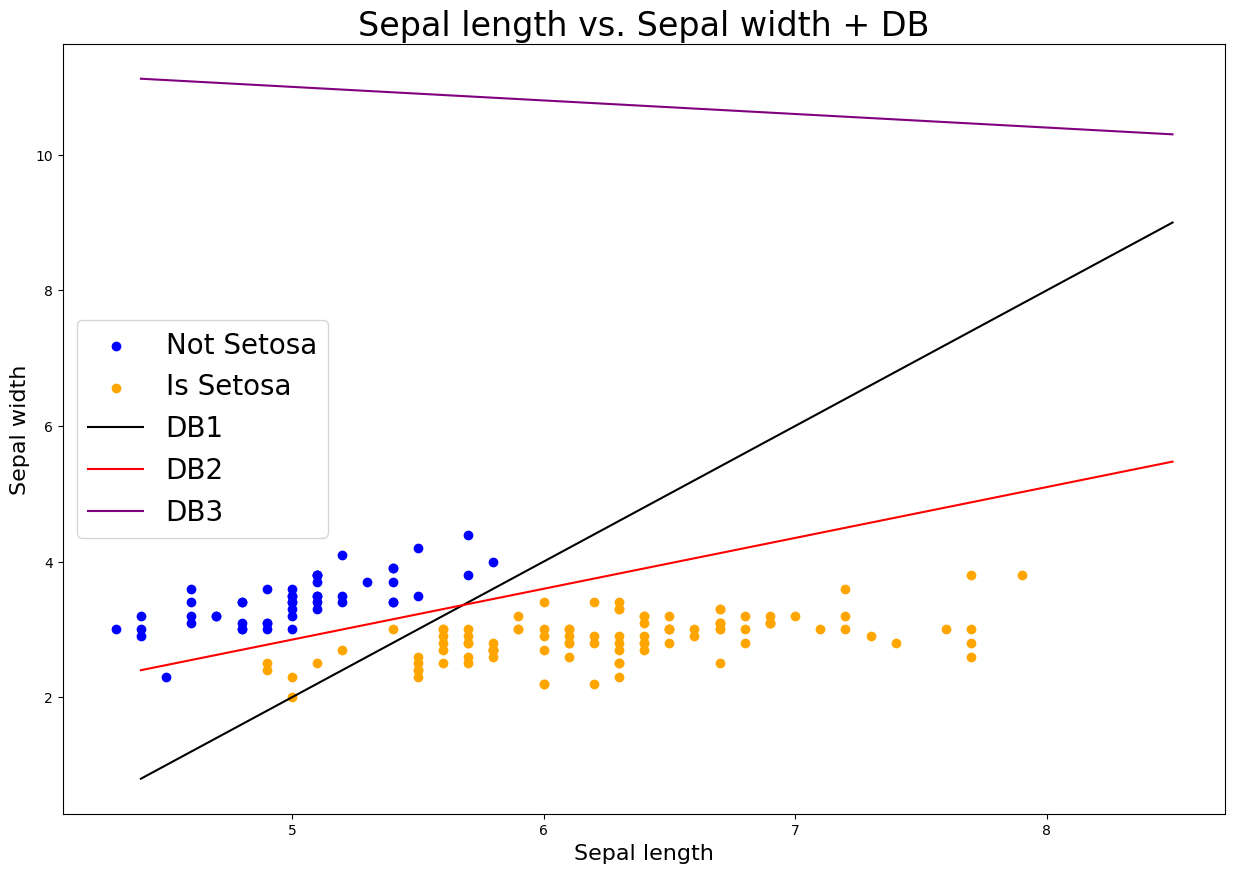

In [73]:
not_setosa = setosa_data[setosa_data['label'] == 0]
is_setosa = setosa_data[setosa_data['label'] == 1]
print(f'Length of none setosas: {len(not_setosa)}')
print(f'Somehow there is 100 setosas: {len(is_setosa)}')

x_mesh = np.linspace(4.4, 8.5)
db1 = np.vectorize(lambda x : 2*x - 8)
db2 = np.vectorize(lambda x : 0.75*x - 0.9)
db3 = np.vectorize(lambda x : -0.2*x + 12)

y_1 = db1(x_mesh)
y_2 = db2(x_mesh)
y_3 = db3(x_mesh)

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(x=not_setosa['sepal_length'], y=not_setosa['sepal_width'], c='blue', label='Not Setosa')
ax.scatter(x=is_setosa['sepal_length'], y=is_setosa['sepal_width'], c='orange', label='Is Setosa')

ax.plot(x_mesh, y_1, color='black', label='DB1')
ax.plot(x_mesh, y_2, color='red', label='DB2')
ax.plot(x_mesh, y_3, color='purple', label='DB3')
ax.legend(loc='best', fontsize=20)
ax.set_xlabel('Sepal length', fontsize=16)
ax.set_ylabel('Sepal width', fontsize=16)
ax.set_title('Sepal length vs. Sepal width + DB', fontsize=24)



### Problem 1 part e

Decision boundary 1:
$$
1x_1 - 2x_2 + 8 = 0
$$
Decision boundary 2:
$$
-0.75x_1 + 1x_2 + 0.9 = 0
$$
Decision boundary 3:
$$
0.2x_1 + x_2 - 12 = 0
$$

### Problem 1 part f

In [74]:
dec_bound_vecs = [[1, -2, 8], [-0.75, 1, 0.9], [0.2, 1, -12]]
features = setosa_data[['sepal_length', 'sepal_width']].values
true_labels = setosa_data['label'].values
print(type(true_labels[0]))
pred_labels = []
for vec in dec_bound_vecs:
    
    pred_label_ = linear_decision_boundary_classifier(vec, features, true_labels, features)
    pred_labels.append(pred_label_)
    print(type(pred_label_[0]))

<class 'numpy.int64'>
<class 'int'>
<class 'int'>
<class 'int'>


c:\CS3400_IPYNB\lab03-Kevin-Paganini\Code\decision_boundaries.py:27: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  neg_label = mode(training_labels[neg_mask])[0]
c:\CS3400_IPYNB\lab03-Kevin-Paganini\Code\decision_boundaries.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid thi

### Problem 1 part g

In [75]:
from sklearn.metrics import accuracy_score
print(f'Clearly its an int: {type(pred_labels[0][0])}')
acc_db1 = accuracy_score(true_labels,pred_labels[0].astype(int)) # very odd that it gets converted to object
acc_db2 = accuracy_score(true_labels,pred_labels[1].astype(int))
acc_db3 = accuracy_score(true_labels,pred_labels[2].astype(int)) 
print(f'Acurracy score for db1: {acc_db1}')
print(f'Acurracy score for db2: {acc_db2}')
print(f'Acurracy score for db3: {acc_db3}')

Clearly its an int: <class 'int'>
Acurracy score for db1: 0.6666666666666666
Acurracy score for db2: 0.9933333333333333
Acurracy score for db3: 0.6666666666666666


### Problem 2 part a and b

In [76]:
versicolor_virginica_data = pd.read_csv(versicolor_virginica_data_file_path)
versicolor_virginica_data.head(10)

,label,sepal_length (cm),sepal_width (cm),petal_length (cm),petal_width (cm)
0,versicolor,7.0,3.2,4.7,1.4
1,versicolor,6.4,3.2,4.5,1.5
2,versicolor,6.9,3.1,4.9,1.5
3,versicolor,5.5,2.3,4.0,1.3
4,versicolor,6.5,2.8,4.6,1.5
5,versicolor,5.7,2.8,4.5,1.3
6,versicolor,6.3,3.3,4.7,1.6
7,versicolor,4.9,2.4,3.3,1.0
8,versicolor,6.6,2.9,4.6,1.3
9,versicolor,5.2,2.7,3.9,1.4


### Some data cleaning

(why would you ever want versicolor, virginica when you can have 0 and 1)

In [77]:
def get_rid_of_garbage(x):
    if x == 'versicolor':
        return 0
    else:
        return 1
    

In [78]:
versicolor_virginica_data['label'] = versicolor_virginica_data['label'].apply(get_rid_of_garbage)
versicolor_virginica_data.head()
versicolor_virginica_data.columns = ['label', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']


### Problem 2 part c and d

Text(0.5, 1.0, 'Sepal length vs. Sepal width')

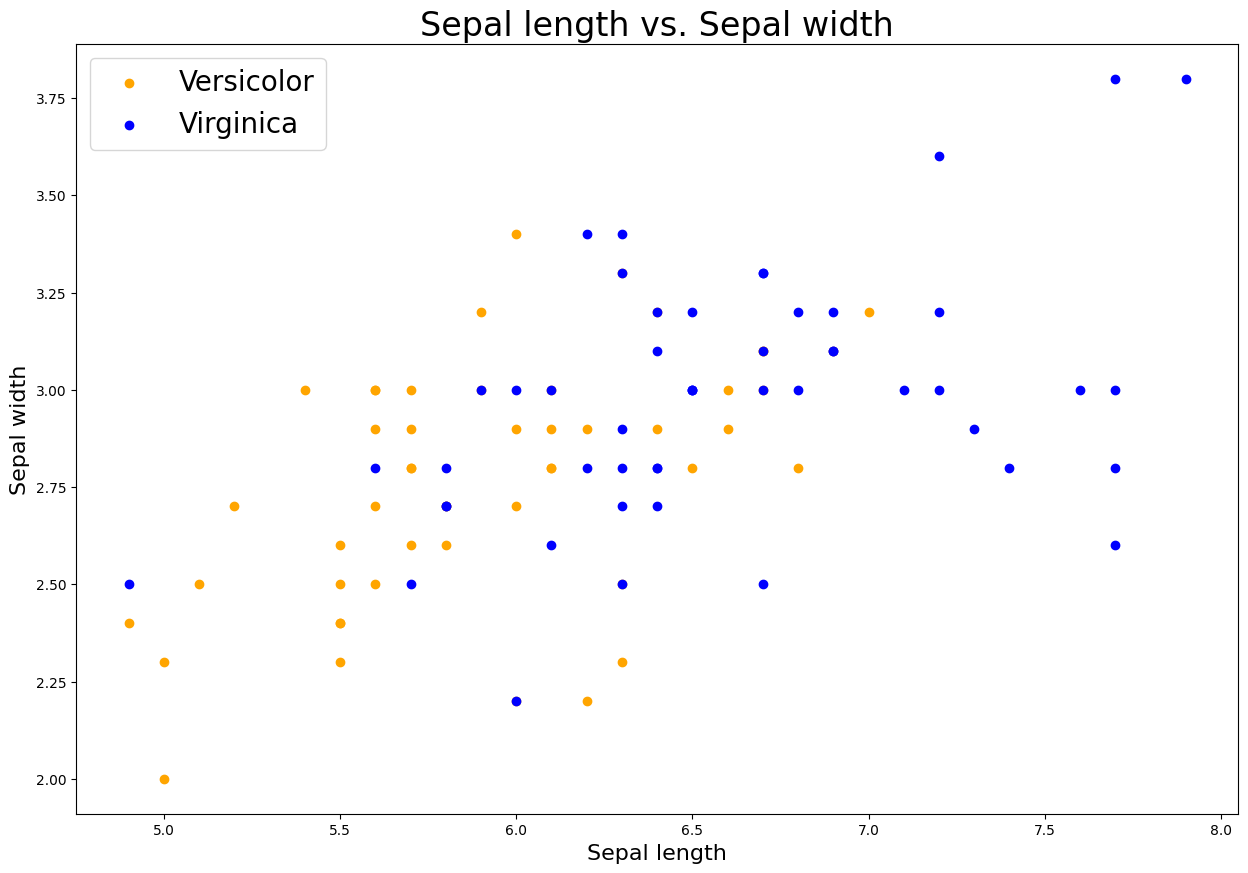

In [79]:
# versicolor = 0
# virginica = 1
versicolor_data = versicolor_virginica_data[versicolor_virginica_data['label'] == 0]
virginica_data = versicolor_virginica_data[versicolor_virginica_data['label'] == 1]

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(versicolor_data['sepal_length'], versicolor_data['sepal_width'], color='orange', label='Versicolor')
ax.scatter(virginica_data['sepal_length'], virginica_data['sepal_width'], color='blue', label='Virginica')
ax.legend(loc='best', fontsize=20)
ax.set_xlabel('Sepal length', fontsize=16)
ax.set_ylabel('Sepal width', fontsize=16)
ax.set_title('Sepal length vs. Sepal width', fontsize=24)


Text(0.5, 1.0, 'Petal length vs. Petal width')

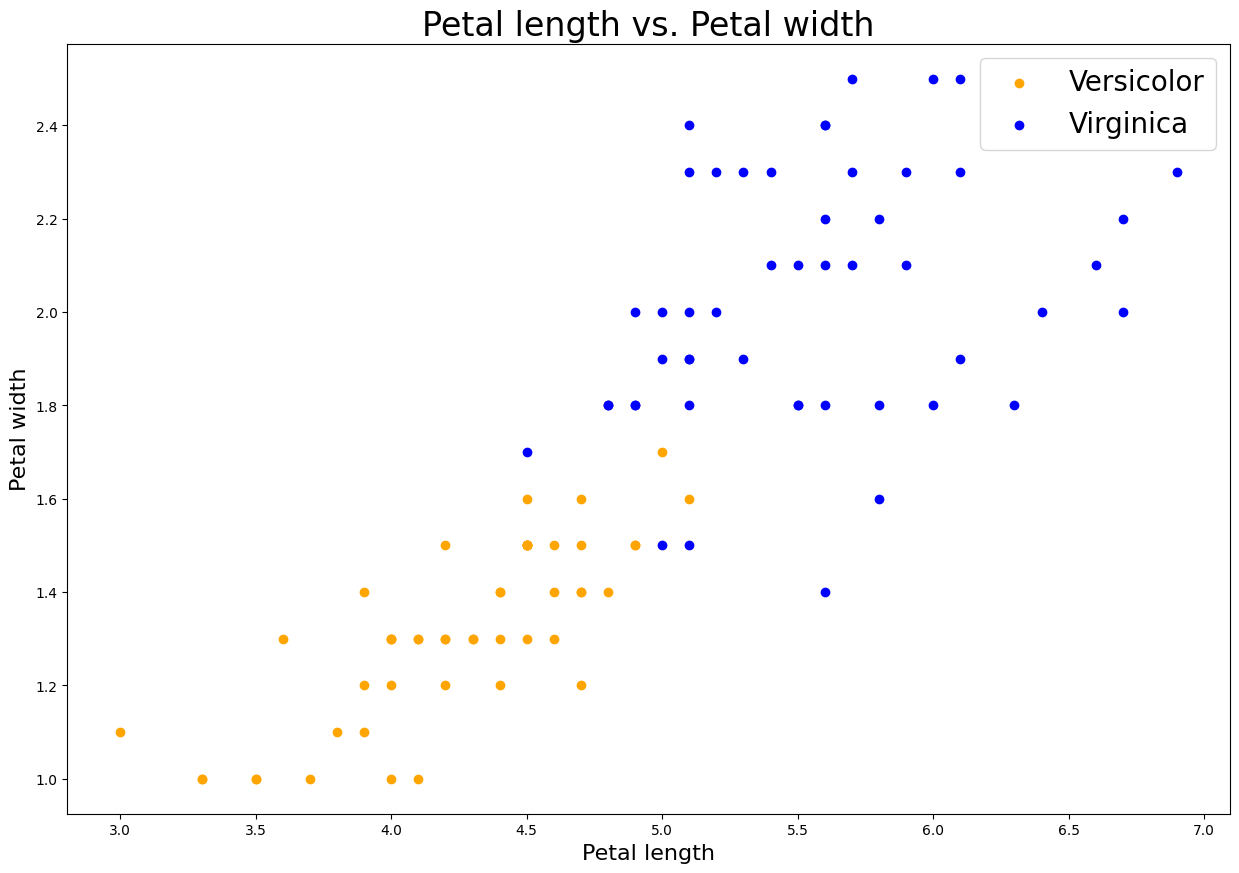

In [80]:
fig, ax = plt.subplots(figsize=(15, 10))


ax.scatter(versicolor_data['petal_length'], versicolor_data['petal_width'], color='orange', label='Versicolor')
ax.scatter(virginica_data['petal_length'], virginica_data['petal_width'], color='blue', label='Virginica')
ax.legend(loc='best', fontsize=20)
ax.set_xlabel('Petal length', fontsize=16)
ax.set_ylabel('Petal width', fontsize=16)
ax.set_title('Petal length vs. Petal width', fontsize=24)

### Problem 2 part e

In [81]:
x_mesh_petal = np.linspace(2, 7.5)
x_mesh_sepal = np.linspace(4.5, 8.5)

db_sepal = np.vectorize(lambda x : -0.7 * x + 7)
db_petal = np.vectorize(lambda x : -0.7 * x + 5)





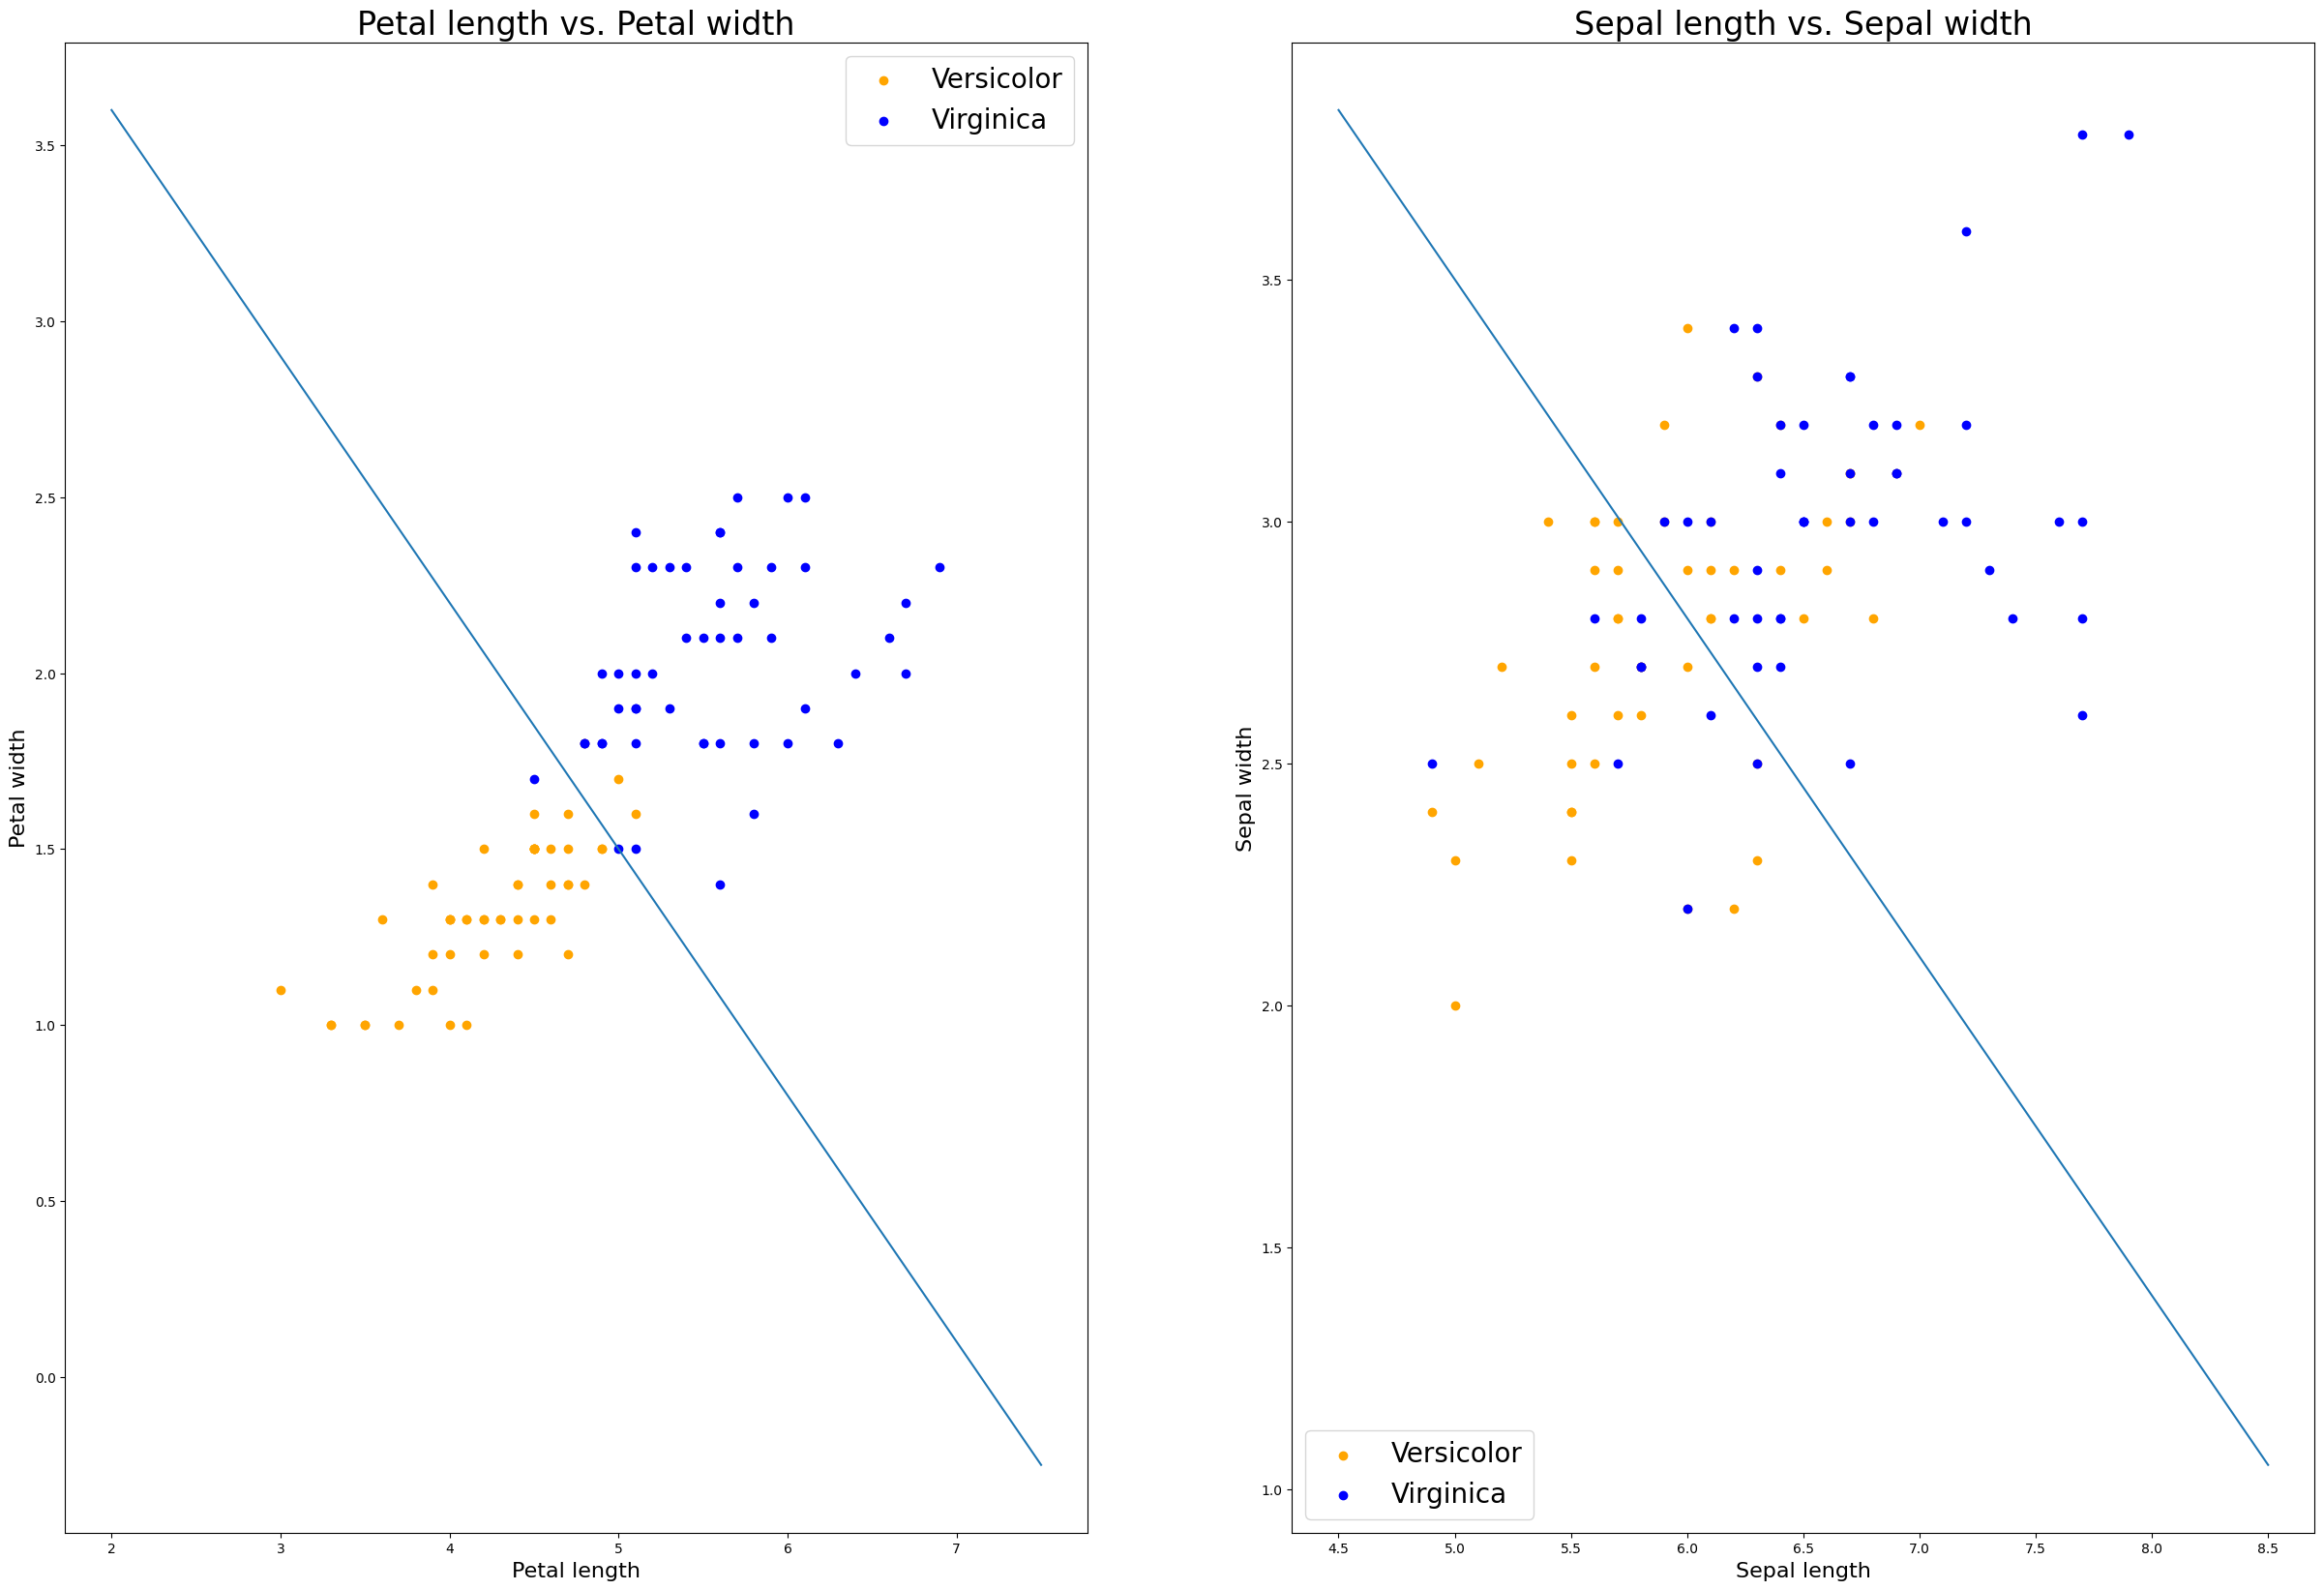

In [82]:
fig, ax = plt.subplots(figsize=(30, 20), ncols=2)

ax[0].scatter(versicolor_data['petal_length'], versicolor_data['petal_width'], color='orange', label='Versicolor')
ax[0].scatter(virginica_data['petal_length'], virginica_data['petal_width'], color='blue', label='Virginica')
ax[0].legend(loc='best', fontsize=20)
ax[0].set_xlabel('Petal length', fontsize=16)
ax[0].set_ylabel('Petal width', fontsize=16)
ax[0].set_title('Petal length vs. Petal width', fontsize=24)

ax[0].plot(x_mesh_petal, db_petal(x_mesh_petal))

ax[1].scatter(versicolor_data['sepal_length'], versicolor_data['sepal_width'], color='orange', label='Versicolor')
ax[1].scatter(virginica_data['sepal_length'], virginica_data['sepal_width'], color='blue', label='Virginica')
ax[1].legend(loc='best', fontsize=20)
ax[1].set_xlabel('Sepal length', fontsize=16)
ax[1].set_ylabel('Sepal width', fontsize=16)
ax[1].set_title('Sepal length vs. Sepal width', fontsize=24)

ax[1].plot(x_mesh_sepal, db_sepal(x_mesh_sepal))

### Problem 2 part f

Decision boundary 1:
$$
-0.7x_1 - x_2 + 7 = 0
$$
Decision boundary 2:
$$
-0.7x_1 -x_2 + 5 = 0
$$

### Problem 2 part g and h

In [83]:
dec_bound_vecs = [[-0.7, -1, 7], [-0.7, -1, 5]]
features = [versicolor_virginica_data[['sepal_length','sepal_width']].values, versicolor_virginica_data[['petal_length', 'petal_width']].values]

true_labels = versicolor_virginica_data['label'].values

pred_labels = []
i = 0
for vec in dec_bound_vecs:
    
    pred_label_ = linear_decision_boundary_classifier(vec, features[i], true_labels, features[i])
    pred_labels.append(pred_label_)
    print(type(pred_label_[0]))
    i += 1

<class 'numpy.int64'>
<class 'int'>
<class 'int'>


c:\CS3400_IPYNB\lab03-Kevin-Paganini\Code\decision_boundaries.py:27: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  neg_label = mode(training_labels[neg_mask])[0]
c:\CS3400_IPYNB\lab03-Kevin-Paganini\Code\decision_boundaries.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid thi

In [84]:
sepal_length_width_acc = accuracy_score(true_labels, pred_labels[0].astype(int))
petal_length_width_acc = accuracy_score(true_labels, pred_labels[1].astype(int))

print(f'Sepal Length vs. Width accuracy score {sepal_length_width_acc}')
print(f'Petal Length vs. Width accuracy score {petal_length_width_acc}')

Sepal Length vs. Width accuracy score 0.7
Petal Length vs. Width accuracy score 0.96


# Problem 3 part a

In [88]:
setosa_testing = pd.read_csv(setosa_testing_file_path)
setosa_training = pd.read_csv(setosa_training_file_path)
setosa_validation = pd.read_csv(setosa_validation_file_path)

cols = ['label', 'sepal_length', 'sepal_width']
setosa_testing.columns = cols
setosa_training.columns = cols
setosa_validation.columns = cols

setosa_testing['label'] = setosa_testing['label'].apply(get_rid_of_bad_labels)
setosa_training['label'] = setosa_training['label'].apply(get_rid_of_bad_labels)
setosa_validation['label'] = setosa_validation['label'].apply(get_rid_of_bad_labels)


setosa_training.head(10)

,label,sepal_length,sepal_width
0,1,6.0,2.9
1,1,7.6,3.0
2,1,7.7,3.0
3,1,7.4,2.8
4,1,6.5,3.2
5,0,5.0,3.5
6,1,7.1,3.0
7,1,6.4,2.8
8,0,4.8,3.4
9,0,5.7,4.4


Text(0, 0.5, 'sepal width')

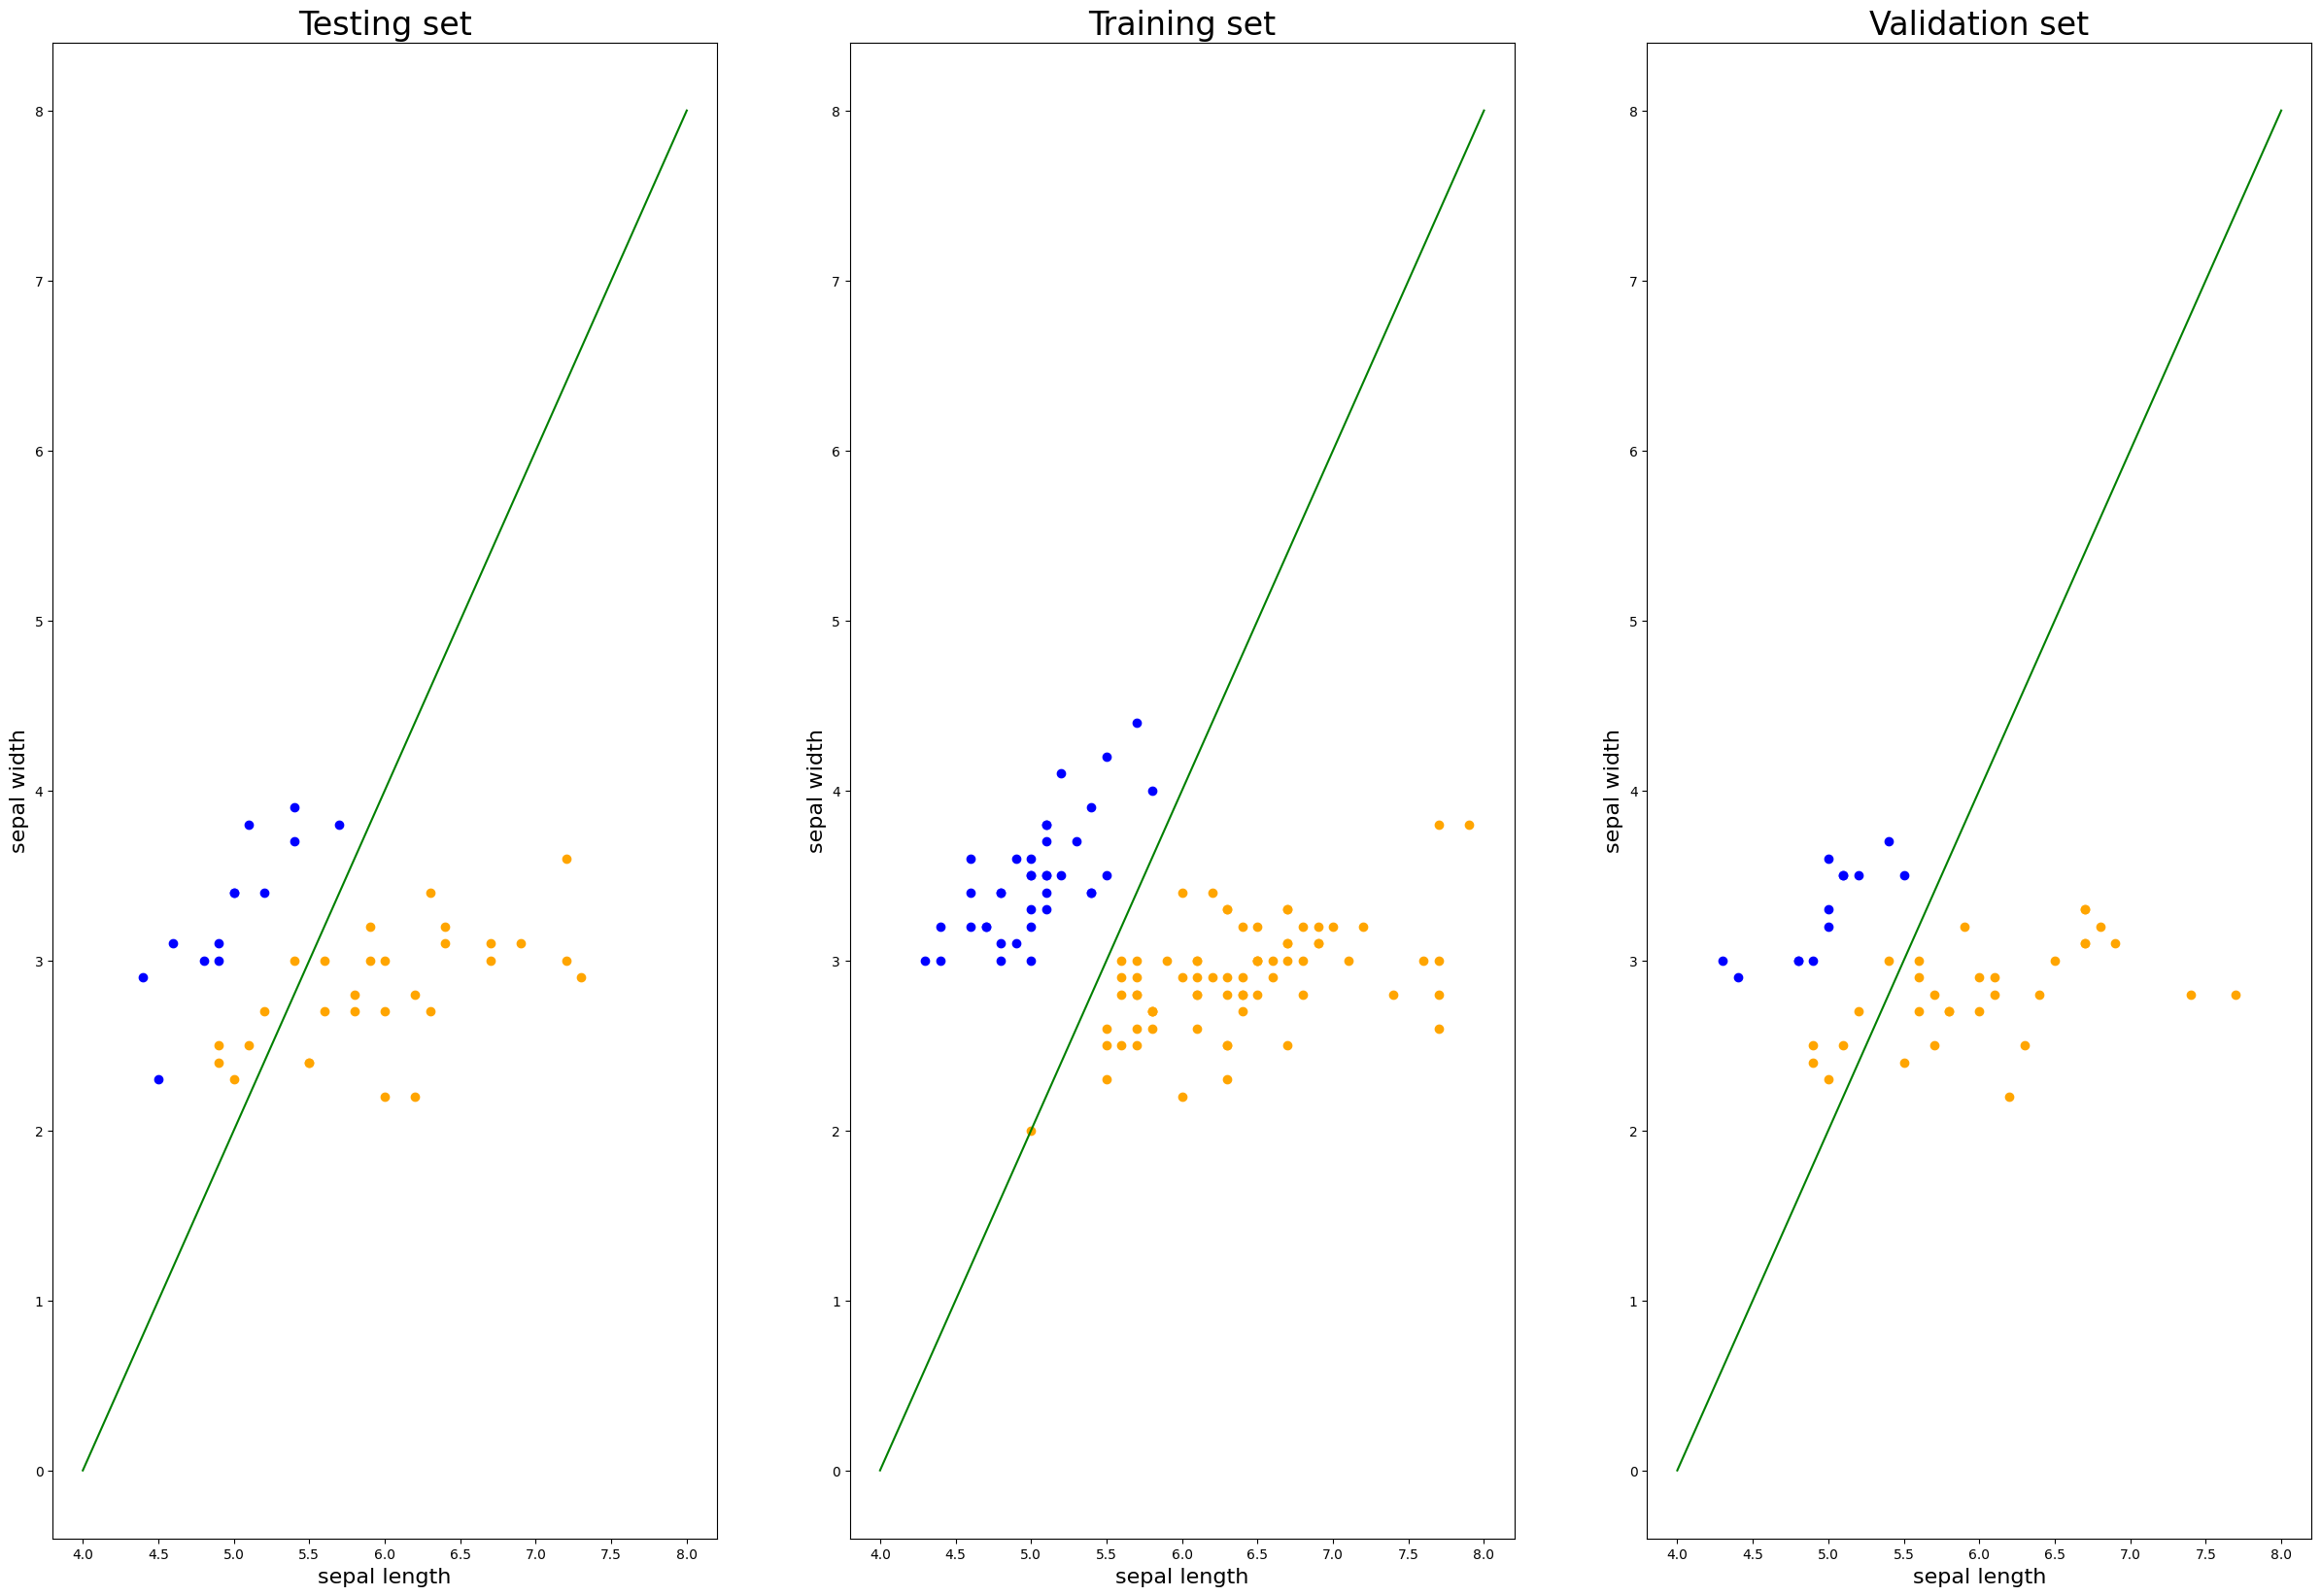

In [102]:
setosa_test_true = setosa_testing[setosa_testing['label'] == 1]
setosa_test_false = setosa_testing[setosa_testing['label'] == 0]
setosa_train_true = setosa_training[setosa_training['label'] == 1]
setosa_train_false = setosa_training[setosa_training['label'] == 0]
setosa_val_true = setosa_validation[setosa_validation['label'] == 1]
setosa_val_false = setosa_validation[setosa_validation['label'] == 0]

# x_2 = 2x_1 - 8
x_mesh = np.linspace(4, 8)
db1 = np.vectorize(lambda x : 2 * x - 8)
y = db1(x_mesh)

fig, ax = plt.subplots(figsize=(30, 20), ncols=3)

ax[0].scatter(setosa_test_true['sepal_length'], setosa_test_true['sepal_width'], color='orange')
ax[0].scatter(setosa_test_false['sepal_length'], setosa_test_false['sepal_width'], color='blue')
ax[0].plot(x_mesh, y, color='green')
ax[0].set_title('Testing set', fontsize=24)
ax[0].set_xlabel('sepal length',fontsize=16)
ax[0].set_ylabel('sepal width', fontsize=16)


ax[1].scatter(setosa_train_true['sepal_length'], setosa_train_true['sepal_width'], color='orange')
ax[1].scatter(setosa_train_false['sepal_length'], setosa_train_false['sepal_width'], color='blue')
ax[1].plot(x_mesh, y, color='green')
ax[1].set_title('Training set', fontsize=24)
ax[1].set_xlabel('sepal length',fontsize=16)
ax[1].set_ylabel('sepal width', fontsize=16)

ax[2].scatter(setosa_val_true['sepal_length'], setosa_val_true['sepal_width'], color='orange')
ax[2].scatter(setosa_val_false['sepal_length'], setosa_val_false['sepal_width'], color='blue')
ax[2].plot(x_mesh, y, color='green')
ax[2].set_title('Validation set', fontsize=24)
ax[2].set_xlabel('sepal length',fontsize=16)
ax[2].set_ylabel('sepal width', fontsize=16)

### Problem 3 part b

In [104]:
dec_bound_vec = [2, -1, -8]
features = [setosa_training[['sepal_length', 'sepal_width']],
            setosa_testing[['sepal_length', 'sepal_width']], 
            setosa_validation[['sepal_length', 'sepal_width']]]

true_labels = setosa_training['label'].values
# (decision_boundary_line_vec, training_points, training_labels, prediction_points)
pred_labels = []
i = 0
for i in range(3):
    
    pred_label_ = linear_decision_boundary_classifier(dec_bound_vec, features[0], true_labels, features[i])
    pred_labels.append(pred_label_)
    print(type(pred_label_[0]))
    i += 1


<class 'int'>
<class 'int'>
<class 'int'>


c:\CS3400_IPYNB\lab03-Kevin-Paganini\Code\decision_boundaries.py:27: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  neg_label = mode(training_labels[neg_mask])[0]
c:\CS3400_IPYNB\lab03-Kevin-Paganini\Code\decision_boundaries.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid thi

In [107]:
train_acc = accuracy_score(true_labels, pred_labels[0].astype(int))

true_labels = setosa_testing['label']
test_acc = accuracy_score(true_labels, pred_labels[1].astype(int))
true_labels = setosa_validation['label']
val_acc = accuracy_score(true_labels, pred_labels[2].astype(int))

In [115]:
print(f'Training accuracy: {train_acc}')
print(f'Testing accuracy: {test_acc}')
print(f'Validation accuracy: {val_acc}')

Training accuracy: 0.9907407407407407
Testing accuracy: 0.8571428571428571
Validation accuracy: 0.8636363636363636


## Appendix: Messing around


['setosa' 'versicolor' 'virginica']


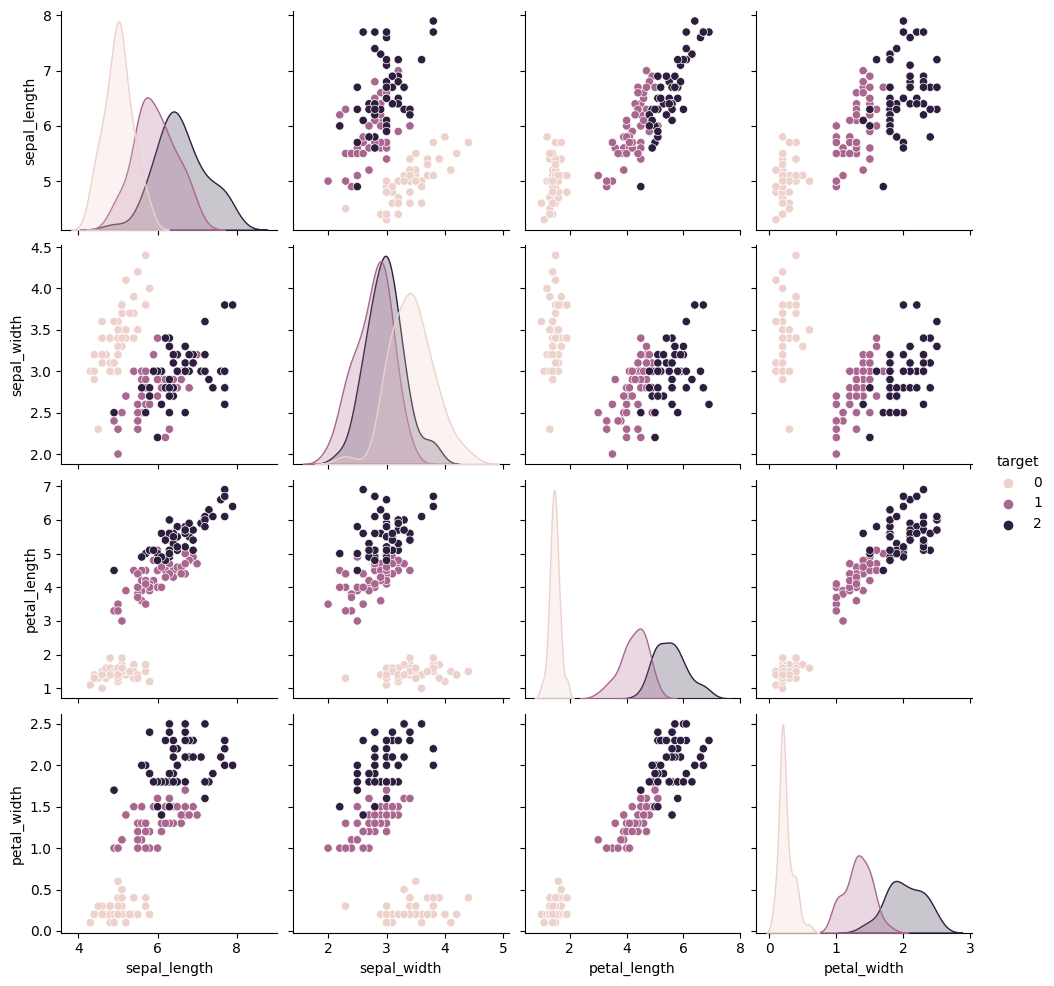

In [167]:
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.model_selection import train_test_split



iris_set = load_iris()
iris_feat = iris_set['data']
iris_tar = iris_set['target']
clean_cols = [col.replace(' (cm)', '') for col in iris_set['feature_names']]

clean_cols = [col.replace(' ', '_') for col in clean_cols]

clean_cols.append('target')


df = pd.DataFrame(iris_feat)
df = df.assign(target=iris_tar)
df.columns = clean_cols
print(iris_set['target_names'])
sns.pairplot(df, hue='target')


### What can we do with this?

Seems like we could make a decision tree that would do quite well with this data
Setosa can simply be classified with petal_length under 2.1 or so (I will get a better number)
To classify virginica vs versicolor petal_width vs petal_length can be useful


In [173]:
train_X, test_X, train_y, test_y = train_test_split(df[df.columns[:-1]], df[df.columns[-1]], random_state=42)

df_setosa = df[df['target'] == 0]
df_virginica = df[df['target'] == 2]
df_versicolor = df[df['target'] == 1]



In [187]:
corr = df.corr()

corr = corr[corr != 1]
corr[corr > 0.9]

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,NaN,NaN,NaN,NaN,NaN
sepal_width,NaN,NaN,NaN,NaN,NaN
petal_length,NaN,NaN,NaN,0.962865,0.949035
petal_width,NaN,NaN,0.962865,NaN,0.956547
target,NaN,NaN,0.949035,0.956547,NaN


Petal length and width are the most important features, followed by sepal length and then sepal width when predicting the target variable

In [200]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3)

dt.fit(train_X, train_y)
predictions = dt.predict(test_X)
acc = accuracy_score(test_y, predictions)
print(acc)
print(dt.get_params())

dt.feature_importances_


1.0
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


array([0.        , 0.        , 0.92991497, 0.07008503])

As seen by the feature importance array we can see that petal length and width are important